# Muestreo
## Introducción
"Bajo ciertas condiciones, una señal continua puede representarse y reconstruirse por completo partiendo del conocimiento de sus valores, o muestras, en puntos igualmente espaciados en el tiempo. Esta propiedad un tanto sorprendente se deriva de un resultado básico que se conoce como el teorema del muestreo." Oppenheim pag. 514.<br>
El teorema de muestreo funciona como puente o nexo entre las señales continuas y discretas. Permite hacer un pasaje de un dominio al otro sin perder información. Esto tiene un potencial enorme: el procesamiento de señales de forma digital cada vez da mejores prestaciones, y muchas veces es de mucha más conveniencia que procesar con un sistema continuo. En las diapositivas de la clase se toca este tema: https://docs.google.com/presentation/d/1pk0KTVLsWa7N4SqyTLOegwT0QUMfGYjsSqe_fuIUYzs/edit#slide=id.g25257dc4745_0_21



En la figura de abajo se muestra el primer paso en el procedimiento del muestreo.
- Partimos de una señal continua $x(t)$ que queremos muestrear. 
- Queremos tomar una muestra cada $T$ segundos. 
- Construimos un tren de impulsos $p(t)$ de período $T$.

Ahora, para quedarnos solo con las muestras deseadas:
\begin{equation}
x_{p}(t) = x(t)p(t)
\end{equation}
Notar que $x_{p}(t)$ aún es una función continua. Es similar a $p(t)$, vale 0 en todos los puntos menos en los instantes múltiplos de $T$ (donde está cada impulso). Sin embargo, en $x_{p}(t)$ los impulsos tienen la altura que tenga $x(t)$ en ese punto. 

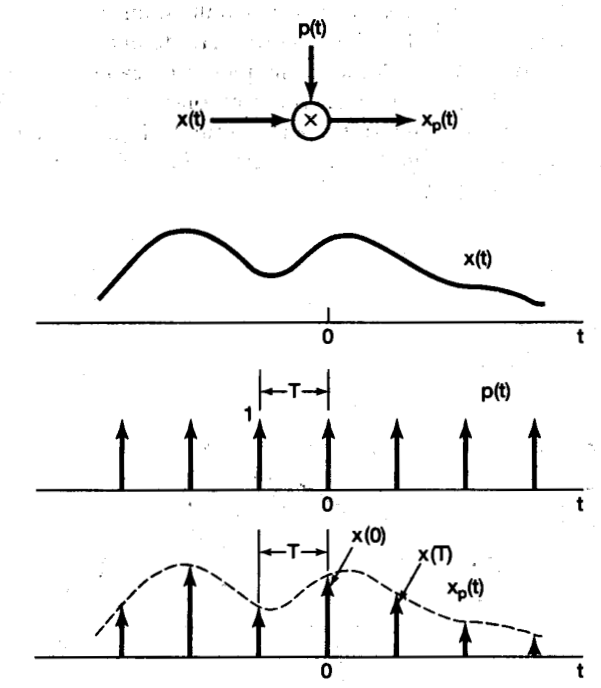

Veámoslo en Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

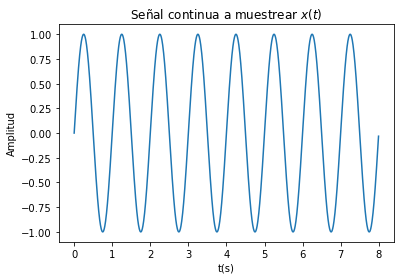

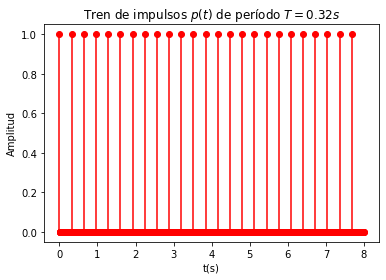

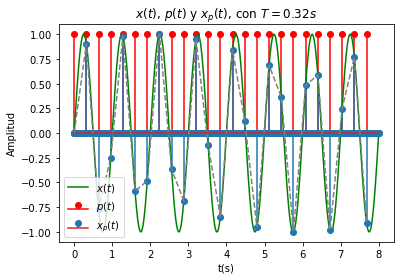

In [2]:
# Genero una señal sinusoidal 'continua', con gran densidad de puntos: x(t)
#..............................................................................
f = 1.0    # Hz, frecuencia de la señal
fsc = 200  # Hz, frecuencia de muestreo densa
ti = 0   # Tiempo de inicio
tf = 8    # Tiempo de fin
t = np.arange(ti, tf, 1/fsc) # eje de tiempo continuo
x = np.sin(2*np.pi*f*t)   # Señal sinusoidal 'continua'
plt.figure()
plt.plot(t, x)
plt.title('Señal continua a muestrear $x(t)$')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')

# Tren de impulsos: p(t)
T = 0.32 # periodo de muestreo
p = np.zeros(len(t))  # defino la senal tren de impulsos p(t)
n = np.arange(0, int(tf/T))  # este vector tiene la cantidad de impulsos que va a tener p(t)

p[n*int(T*fsc)] = 1  # T*fsc me da en unidad de muestras, donde esta ubicado T

plt.figure()
plt.stem(t, p, basefmt='r-', linefmt='r-', markerfmt='ro')
plt.title('Tren de impulsos $p(t)$ de período $T = '+ str(T) +'s$')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')

# Calculo de xp(t)
xp = x*p

plt.figure()
plt.stem(t, p, basefmt='r-', linefmt='r-', markerfmt='ro', label = '$p(t)$')
plt.plot(t, x, label = '$x(t)$', color = 'green')
plt.stem(t, xp, label = '$x_{p}(t)$')
plt.title('$x(t)$, $p(t)$ y $x_{p}(t)$, con $T = '+ str(T) +'s$')
plt.plot(n*T, xp[n*int(T*fsc)], color = 'grey', linestyle = '--')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.legend()


Ahora veamos que pasa en frecuencia. Para ello definamos notación:
- Al eje de frecuencia que obtenemos al hacer la transformada de Fourier en tiempo continuo, lo escribimos como $\Omega$.
- Definimos $\Omega_{s} = 2\pi / T$, la cual corresponde a la frecuencia del muestreo (cada cuánto tomamos una muestra de $x(t)$).
- Definamos las trasnformadas de Fourier en tiempo continuo de las funciones que tenemos hasta ahora:

\begin{equation}
x(t) \overset{CTFT}{\longrightarrow} X(j\Omega)
\end{equation}

\begin{equation}
p(t) \overset{CTFT}{\longrightarrow} P(j\Omega)
\end{equation}

\begin{equation}
x_{p}(t) \overset{CTFT}{\longrightarrow} X_{p}(j\Omega)
\end{equation}

Usando propiedades y resultados vistos anteriormente se puede llegar a la siguiente expresión para $X_{p}(j\Omega)$ (pag. 517 Opp.):

\begin{equation}
X_{p}(j\Omega) = \dfrac{1}{T}\sum_{k = -\infty}^{+\infty}X(j(\Omega -k\Omega_{S} ))
\end{equation}

Por lo tanto, si quiero $X_{p}(j\Omega)$, agarro $X(j\Omega)$, coloco una copia cada $\Omega_{S}$, y multiplico todo por $1/T$.
Notar que es deseable un $T$ chico para que las copias queden más espaciadas y no haya solapamientos. No queremos solapamientos, porque si eventualmente queremos recuperar $X(j\Omega)$, podemos hacerlo colocando un pasabajos (o pasabandas) y quedándonos solo con una de las copias. <br>
Para que no haya solapamiento, se tiene que cumplir:
\begin{equation}
\Omega_{S} > 2\Omega_{M}
\end{equation}<br>
Siendo $\Omega_{M}$ la frecuencia máxima de $x(t)$, es decir la frecuencia máxima donde $X(j\Omega)$ es distinto de 0.
Por lo tanto, si se cumple esta condición, siempre vamos a poder recuperar $x(t)$ a partir de $x_{p}(t)$.<br>
En la imagen se ilustra esto. Aclaración: para ser coherente con la notación que estamos usando, habría que usar $\Omega$ en lugar de $\omega$.

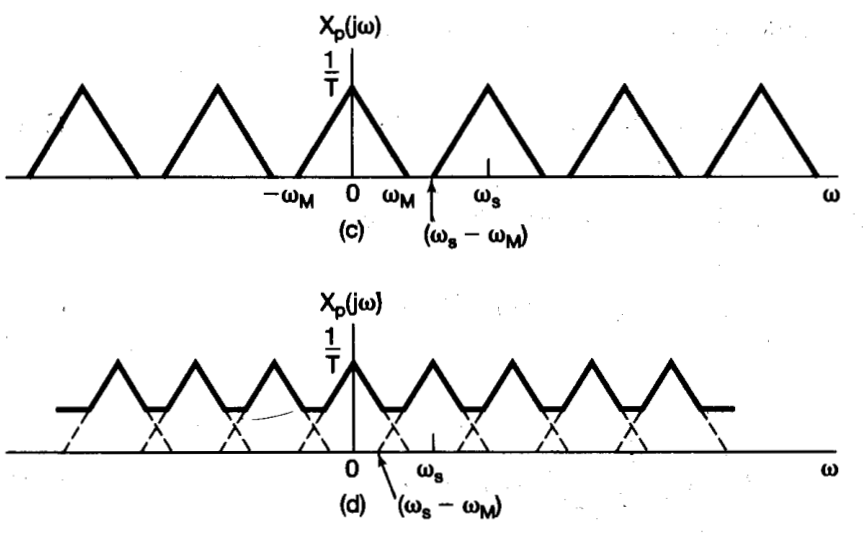
Enunciado del teorema del muestreo. Se aplica el mismo cambio de notación que para la imagen anterior.
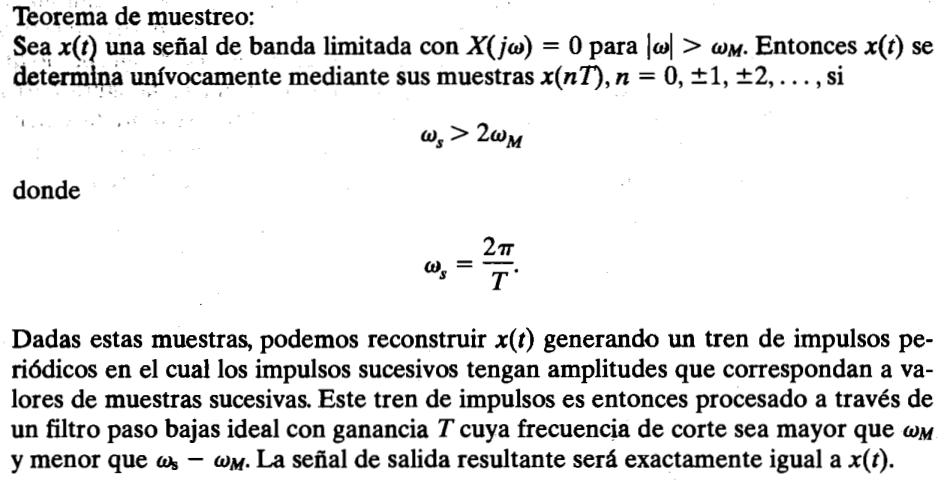

Como se mencionaba anteriormente, si quisiéramos recuperar $X(j\Omega)$ a partir de $X_{P}(j\Omega)$ deberíamos usar un pasabajos y quedarnos solo con una de las copias. Por lo tanto, el procedimiento que hicimos hasta ahora se puede resumir en la imagen de a continuación. Recordar que un producto en el tiempo, se traduce a una convolución en frecuencia.

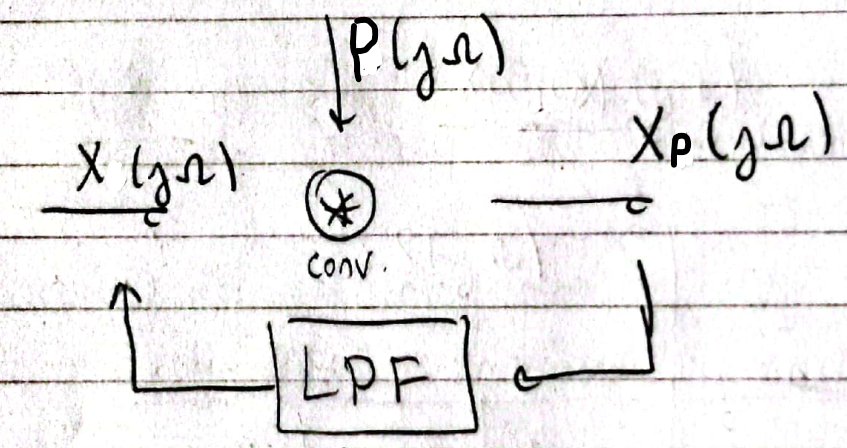

Ahora veamos más en detalle cómo es este filtro pasabajos LPF. Nuevamente, para que la notación quede coherente, habría que usar $\Omega$ en lugar de $\omega$. Por lo tanto, el LPF tendría frecuencia de corte $\Omega_{C}$. Por otro lado, observar que la señal reconstruída $X_{R}(j\Omega)$ es igual que $X(j\Omega)$ lo cual es nuestro objetivo: que sean iguales.
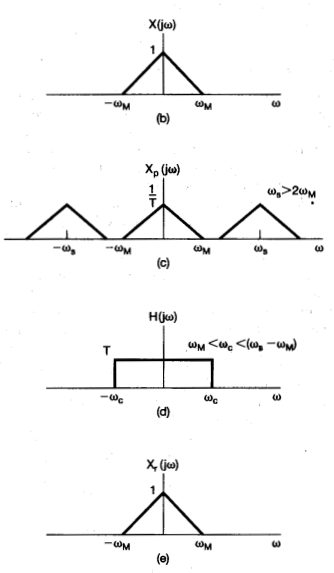

## Pasaje a tiempo discreto (TD)
Pag. 534 Opp. <br>
Como dijimos, puede ser muy útil trabajar con sistemas discretos, para eso se hace el muestreo de una señal continua. Por lo tanto, partiendo de lo que ya vimos, veamos cómo pasamos a tiempo discreto y después volvemos a tiempo continuo: no perder de vista que el objetivo siempre es volver a nuestra $x(t)$ (o $X(j\Omega)$).<br>
Se explica en los primeros 15 minutos de la clase 25 (2): https://eva.interior.udelar.edu.uy/mod/hvp/view.php?id=62784

En primer lugar, la señal discreta que vamos a considerar $x_{d}[n]$ contiene los valores que capturamos con $p(t)$, es decir, los valores distintos de 0 de $x_{p}(t)$. En otras palabras, por cada delta que colocamos en $p(t)$, se guarda un valor en $x_{d}[n]$. Es preciso recordar que colocamos una delta cada $T$ segundos, en consecuencia, vamos a tomar una muestra cada $T$ segundos. Por consiguiente, $x_{d}[n]$ queda definida de la siguiente forma: $x_{d}[n] = x(nT)$, con $n$ natural.<br>

El resultado al que vamos a llegar, es que existe una relación directa entre $X_{p}(j\Omega)$ y $X_{d}(e^{j\omega})$, siendo esta la transformada de Fourier en tiempo discreto de $x_{d}[n]$. <br>

Partamos de cómo se define $x_{p}(t)$ según lo que hicimos anteriormente, y operemos.
\begin{equation}
x_{p}(t) = x(t)\sum_{n = -\infty}^{+\infty}\delta (t - nT) = \sum_{n = -\infty}^{+\infty}x(t)\delta (t - nT)
\end{equation}

Lo anterior, podemos hacerlo porque $x(t)$ no depende de $t$. Ahora, si aplicamos la propiedad de muestreo de la delta obtenemos:
\begin{equation}
x_{p}(t) = \sum_{n = -\infty}^{+\infty}x(nT)\delta (t - nT)
\end{equation}

Ahora, tomando la CTFT de $x_{p}(t)$, es decir aplicando directamente la ecuación de análisis, y luego sustituyendo el resultado anterior por $x_{p}(t)$:

\begin{equation}
X_{p}(j\Omega) = \int_{-\infty}^{+\infty}x_{p}(t)e^{-j\Omega t}dt = \int_{-\infty}^{+\infty}\left( \sum_{n = -\infty}^{+\infty}x(nT)\delta (t - nT) \right)e^{-j\Omega t}dt
\end{equation}

Ahora, reagrupando y usando la propiedad de integración de la delta (ver video), llegamos a la siguiente expresión:
\begin{equation}
X_{p}(j\Omega) = \sum_{n = -\infty}^{+\infty}x(nT)e^{-jnT\Omega} 
\end{equation}

Considerando que definimos $x_{d}[n] = x(nT)$, finalmente llegamos a:
\begin{equation}
X_{p}(j\Omega) = \sum_{n = -\infty}^{+\infty}x_{d}[n]e^{-jnT\Omega} 
\end{equation}

Por otro lado, si aplicamos la tranformada de Fourier en tiempo discreto (DTFT) directamente sobre $x_{d}[n]$, obtenemos la siguiente expresión:
\begin{equation}
X_{d}(e^{j\omega}) = \sum_{n = -\infty}^{+\infty}x_{d}[n]e^{-jn\omega} 
\end{equation}
Al eje de frecuencia cuando hacemos una DTFT, lo notamos como $\omega$. Las últimas dos ecuaciones corresponden a $X_{d}(e^{j\omega})$ y $X_{p}(j\Omega)$: observar que son prácticamente iguales, solo hay que considerar $\omega = T\Omega$. Esto nos otorga un pasaje de tiempo continuo ($X_{p}(j\Omega)$) a tiempo discreto ($X_{d}(e^{j\omega})$) de una forma increiblemente rápida y fácil.<br>
En resumen, para trabajar en tiempo discreto tenemos dos formas rápidas de hallar expresiones en tiempo y frecuencia:
- En tiempo: $x_{d}[n] = x(nT)$.
- En frecuencia: $X_{d}(e^{j\omega}) = X_{p}(j\frac{\omega}{T}))$, y $X_{p}(j\Omega)$ tiene la expresión vista. <br>

Ahora, tomando esto ultimo y la relacion entre $X_{p}(j\Omega)$ y $X(j\Omega)$ que se recuerda a continuacion, vamos a poder establecer una relacion entre $X_{d}(e^{j\omega})$ y $X(j\Omega)$.

\begin{equation}
X_{p}(j\Omega) = \dfrac{1}{T}\sum_{k = -\infty}^{+\infty}X(j(\Omega -k\Omega_{S} ))
\end{equation}

Relacion entre $X_{d}(e^{j\omega})$ y $X(j\Omega)$:
\begin{equation}
X_{d}(e^{j\omega}) = X_{p}\left(j\left(\frac{\omega}{T}\right)\right) = \dfrac{1}{T}\sum_{k = -\infty}^{+\infty}X\left(j\left(\frac{\omega}{T} -k\Omega_{s} \right)\right)
\end{equation}

Recordando que $\Omega_{s} = 2\pi / T$, obtenemos:
\begin{equation}
X_{d}(e^{j\omega}) = \dfrac{1}{T}\sum_{k = -\infty}^{+\infty}X\left(j \left(\omega - k2\pi \right)/T\right)
\end{equation}

Revisar como hacemos en el teorico esto


## Ejemplo
Voy a trabajar con una combinación lineal de cosenos de: $0Hz, 1Hz, 2Hz, 3Hz, 4Hz$. Poseen las siguientes amplitudes respectivamente: $1, 1.6, 1.2, 0.8, 0.4$.

C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'fft de s(t)')

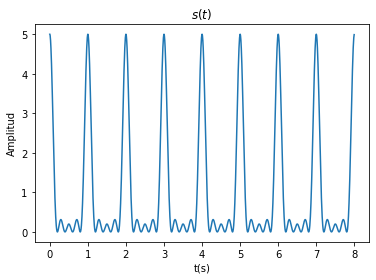

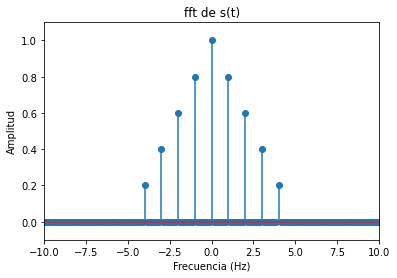

In [3]:
# Uso el mismo eje de tiempo t
# Construyo una senal nueva
w_cos = [0, 1, 2, 3, 4]
w_cos = np.array(w_cos)*2*np.pi
amp_cos = [1, 1.6, 1.2, 0.8, 0.4]

s = amp_cos[0]*np.cos(w_cos[0]*t) + amp_cos[1]*np.cos(w_cos[1]*t)+ amp_cos[2]*np.cos(w_cos[2]*t)+ amp_cos[3]*np.cos(w_cos[3]*t)+ amp_cos[4]*np.cos(w_cos[4]*t)

freq = np.fft.fftfreq(len(t), d=1/fsc)
transf_s = np.fft.fft(s, norm='forward')

plt.figure()
plt.plot(t, s)
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.title('$s(t)$')

# Puede ser una consigna. Hacer la fft y chequear que el resultado es el mismo
plt.figure()
plt.stem(freq, transf_s)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('fft de s(t)')




Como ya se ve en el curso, la Transformada de Fourier en tiempo continuo de un coseno, es una delta de altura $0.5$ en $-\omega_{0}$ y otra en $\omega_{0}$. (En libro dice que la altura es pi, revisar).

Text(0.5, 1.0, 'Transformada de Fourier de s(t)')

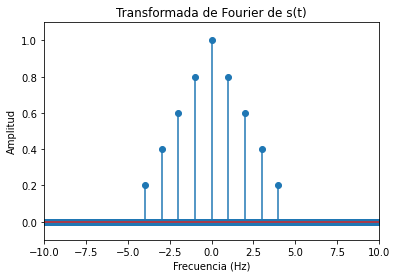

In [4]:
# Creo un eje de frecuencia
w = np.arange(int(-np.pi*fsc), int(np.pi*fsc), 0.1)
f = w/(2*np.pi)

S_jw = np.zeros(len(w))
ind_cero = np.argmin(np.abs(w - w_cos[0]))
S_jw[ind_cero] = amp_cos[0]  # luego el resto de los casos es sobre 2

for i in range(1, len(w_cos)):
    ind = np.argmin(np.abs(w - w_cos[i]))
    S_jw[ind] = amp_cos[i]/2    # coloco la delta en w0
    S_jw[ind_cero - (ind-ind_cero)] = amp_cos[i]/2  # coloco la delta en -w0
    

plt.figure()
plt.stem(f, S_jw)
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de s(t)')

Vuelvo a traer mi tren de impulsos

Text(0, 0.5, 'Amplitud')

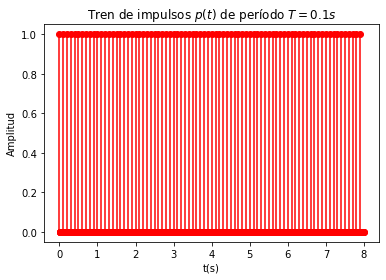

In [5]:
# Tren de impulsos: p(t)
T = 0.1 # periodo de muestreo
p = np.zeros(len(t))  # defino la senal tren de impulsos p(t)
n = np.arange(0, int(tf/T))  # este vector tiene la cantidad de impulsos que va a tener p(t)

p[n*int(T*fsc)] = 1  # T*fsc me da en unidad de muestras, donde esta ubicado T

plt.figure()
plt.stem(t, p, basefmt='r-', linefmt='r-', markerfmt='ro')
plt.title('Tren de impulsos $p(t)$ de período $T = '+ str(T) +'s$')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')

Voy a calcular $x_{p}(t) = s(t)p(t)$ para este caso.

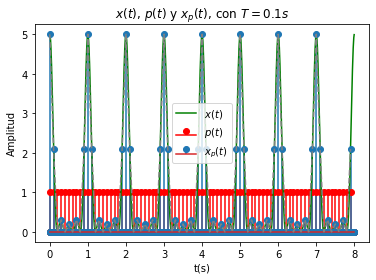

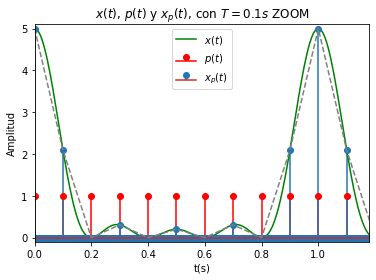

In [6]:
# Calculo de xp(t)
xp = s*p

plt.figure()
plt.stem(t, p, basefmt='r-', linefmt='r-', markerfmt='ro', label = '$p(t)$')
plt.plot(t, s, label = '$x(t)$', color = 'green')
plt.stem(t, xp, label = '$x_{p}(t)$')
plt.title('$x(t)$, $p(t)$ y $x_{p}(t)$, con $T = '+ str(T) +'s$')
plt.plot(n*T, xp[n*int(T*fsc)], color = 'grey', linestyle = '--')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.legend()

# con zoom
plt.figure()
plt.stem(t, p, basefmt='r-', linefmt='r-', markerfmt='ro', label = '$p(t)$')
plt.plot(t, s, label = '$x(t)$', color = 'green')
plt.stem(t, xp, label = '$x_{p}(t)$')
plt.title('$x(t)$, $p(t)$ y $x_{p}(t)$, con $T = '+ str(T) +'s$ ZOOM')
plt.plot(n*T, xp[n*int(T*fsc)], color = 'grey', linestyle = '--')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.axis([0, 1.18, -0.1, 5.1])

plt.legend()

Veamos los resultados de la fft.

C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Manu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


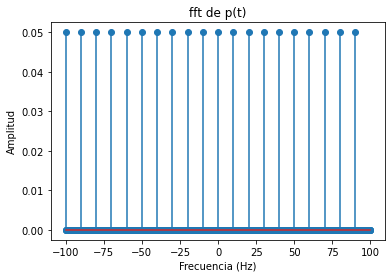

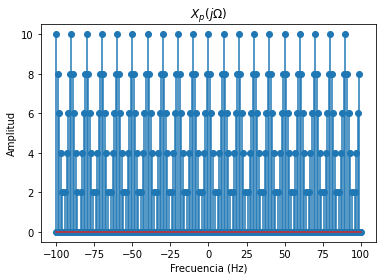

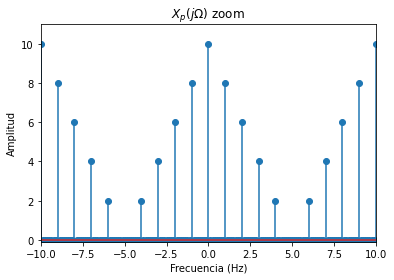

In [7]:
# fft de p(t)
freq = np.fft.fftfreq(len(t), d=1/fsc)
transf_p = np.fft.fft(p, norm = 'forward')
#transf_p/= len(t)
#transf_p *= (2*np.pi)/T
# Puede ser una consigna. Hacer la fft y chequear que el resultado es el mismo
plt.figure()
plt.stem(freq, transf_p)
#plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('fft de p(t)')

# fft de xp(t)
freq = np.fft.fftfreq(len(t), d=1/fsc)
transf_xp = np.fft.fft(xp, norm = 'forward')
#transf_p/= len(t)
#transf_p *= (2*np.pi)/T
# Puede ser una consigna. Hacer la fft y chequear que el resultado es el mismo
plt.figure()
plt.stem(freq, transf_xp*fsc)  # si la multiplico por fsc la amplitud me da bien
#plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('$X_{p}(j\Omega)$')

plt.figure()
plt.stem(freq, transf_xp*fsc)
plt.axis([-10, 10, -0.1, 11])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('$X_{p}(j\Omega)$ zoom')

transf_xp = transf_xp*fsc

Posible pregunta para el estudiante. <br>
Notar que $X_{p}(j\Omega)$ es $S(j\Omega)$ escalado por $1/T$ y con repeticiones cada $1/T$, lo cual es logico ya que si graficaramos esto en $\Omega$, habria que multiplicar por $2\pi$, entonces las copias quedarian cada $\Omega_{s}=2\pi /T$, lo cual se corresponde con lo visto anteriormente.

Ahora voy a aplicar un filtro pasabajos para recuperar la senal anterior, quedandome solo con una de las copias.

(-25.0, 25.0, -0.1, 1.1)

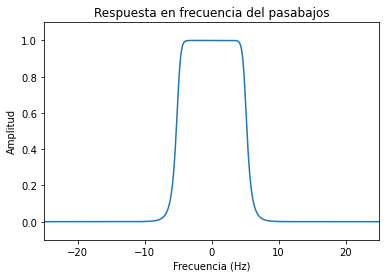

In [8]:
# Frecuencia de corte
#frecuencia_corte1 = 0.0  # Frecuencia de corte
frecuencia_corte2 = 5.0  # Frecuencia de corte

# Es como freq
freq_lin = np.linspace(-0.5, 0.5, len(transf_xp))*fsc

# Orden del filtro
orden = 10

# Diseña el filtro Butterworth pasa bajos en tiempo continuo
b, a = signal.butter(orden, frecuencia_corte2, btype='low', analog=True)

# Visualizar la respuesta en frecuencia del filtro
frecuencias, respuesta = signal.freqs(b, a, freq_lin)
plt.figure()
plt.plot(frecuencias, np.abs(respuesta))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Respuesta en frecuencia del pasabajos')
plt.axis([-25, 25, -0.1, 1.1])


(-10.0, 10.0, -0.1, 11.0)

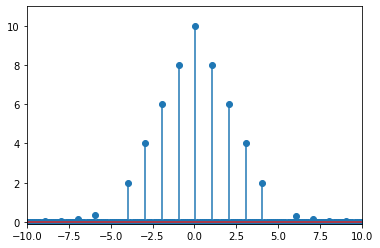

In [9]:
transf_xp = np.fft.fftshift(transf_xp)

Xr_jw = respuesta*transf_xp

plt.figure()
plt.stem(freq_lin, np.abs(Xr_jw))
#plt.axis([-5, 5, -0.01, 0.06])
plt.axis([-10, 10, -0.1, 11])


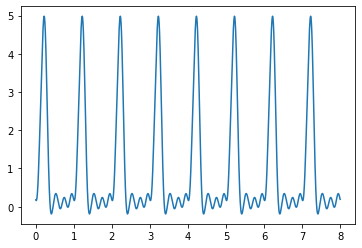

In [10]:
Xr_jw = np.fft.fftshift(Xr_jw)

re = np.fft.ifft(Xr_jw)*len(t)

# Tengo que multiplicarlo por la ganancia T
plt.figure()
plt.plot(t, re.real*T)

**Consigna:**
- comparar con la senal inicial $s(t)$.
- Cambiar el orden del filtro y observar las diferencias, tanto en tiempo como en frecuencia.


### Transformación 2: obtención de $x[n]$ a partir de $x_{s}(t)$ y $T$.
Como se vio, es posible pasar de $x_{c}(t)$ a  $x_{s}(t)$, y luego hacer en camino inverso usando un filtro pasabajos. Ahora estudiaremos el pasaje de $x_{s}(t)$ a $x[n]$, lo cual implica ir de tiempo continuo a tiempo discreto.
<br>
Definamos:
\begin{equation}
x[n] \overset{DTFT}{\longrightarrow} X_{d}(e^{j\omega})
\end{equation}